# **Loading a bioimage.io model**

This notebook shows how to interact with the `bioimageio.spec` programmatically to explore, load and export content from the [BioImage Model Zoo](https://bioimage.io).
To conveniently inspect and edit models, check out the [model builder GUI](https://github.com/kreshuklab/bioimageio_rs/releases). The bioimageio.spec library is documented [here](https://bioimage-io.github.io/spec-bioimage-io/bioimageio/spec.html). Its 

## Setup

### Running local

If you are running the notebook locally you need to pip install the following dependencies into your local environment.
Make sure to restart your notebook kernel after installing dependencies.

```console
pip install bioimageio.spec "bioimageio.core[pytorch]" devtools
```

### Running in colab

If you are running this notebook through colab, there is no need to install dependencies manually.

In [1]:
import os

# install dependencies if running in colab
if os.getenv("COLAB_RELEASE_TAG"):
    %pip install bioimageio.spec bioimageio.core[pytorch] devtools

## Imports and helpers

In [2]:
from typing import Any

import imageio.v3
import matplotlib.pyplot as plt
from numpy.typing import NDArray

from bioimageio.spec.utils import download
from bioimageio.spec.pretty_validation_errors import (
    enable_pretty_validation_errors_in_ipynb,
)

try:
    from devtools import pprint
except ImportError:
    from pprint import pprint


from io import BytesIO


def imread(src: bytes) -> NDArray[Any]:
    """typed `imageio.v3.imread`"""
    img: NDArray[Any] = imageio.v3.imread(BytesIO(src))
    return img


# Improve readiblity of validation errors
enable_pretty_validation_errors_in_ipynb()

C:\Users\fbeut\AppData\Local\Temp\ipykernel_22144\2187042156.py:27: DeprecationWarning: deprecated, this is enabled by default at import time.
  enable_pretty_validation_errors_in_ipynb()


## Inspect the available models in the BioImage Model Zoo

Go to https://bioimage.io to browse available models.

To conveniently inspect and edit models, check out the [model builder GUI](https://github.com/kreshuklab/bioimageio_rs/releases).

## Load a model description

bioimage.io resources may be identified via their bioimage.io ID, e.g. "affable-shark" or the [DOI](https://doi.org/) of their [Zenodo](https://zenodo.org/) backup.

Both of these options may be version specific ("affable-shark/1.2" or a version specific [Zenodo](https://zenodo.org/) backup [DOI](https://doi.org/)).

Alternativly any Resource Description File (RDF) source may be loaded by providing a local path or URL. This is a YAML file that we use in the context of bioimage.io to describe a model's meta data.

Select one of the possible model source options below.

In [3]:
from bioimageio.spec import load_model_description
from bioimageio.spec.model import ModelDescr

# Load the model description with one of the following options
model_source = "affable-shark"
# model_source = "emotional-cricket"

# alternative model sources
# # from a local RDF source
# model_source = "some/local/bioimageio.yaml"

# # from a local package with a bioimageio.yaml (or rdf.yaml) inside.
# model_source = "some/local/package.zip"

# # concept DOI of backup on zenodo.org
# model_source = "10.5281/zenodo.11092561"

model = load_model_description(model_source, format_version="latest")

You now successfully loaded a model! 🎉

The subsequent cells demo addtional capabilities of the bioimageio.spec library that allow you to interact with specific parts of your model's metadata.

If you want to jump directly to model usage check out
[model_usage.ipynb](https://github.com/bioimage-io/core-bioimage-io-python/blob/main/example/model_usage.ipynb) where bioimageio.core -- a library building on top of bioimageio.spec -- is demoed.

Note: bioimage.io models can be specified following different format versions. This notebook expects the latest format version (which is ensured by the `format_version="latest"` argument above).

## Inspect the model description

The model description contains everything bioimageio needs to run and interact with the model plus additional metadata to make all our models [FAIR](https://www.go-fair.org/fair-principles).

Below we print a few fields from the model description, all fields are documented [here](https://bioimage-io.github.io/spec-bioimage-io/bioimageio/spec.html#ModelDescr).

### High level description

In [4]:
print(f"The model is named '{model.name}'")
print(f"Description text:\n{model.description}")
print(f"License: {model.license}")

The model is named 'Nuclei Segmentation Boundary Model'
Description text:
Nucleus segmentation for fluorescence microscopy
License: CC-BY-4.0


### Provenance

The following fields ensure academic provenance and correct citation.

In [5]:
print("\nThe authors of the model are:")
pprint(model.authors)
print("\nIn addition to the authors it is maintained by:")
pprint(model.maintainers)
print("\nIf you use this model, you are expected to cite:")
pprint(model.cite)


The authors of the model are:
[Author(affiliation='EMBL Heidelberg', email=None, orcid=None, name='Constantin Pape', github_user='constantinpape')]

In addition to the authors it is maintained by:
[Maintainer(affiliation=None, email=None, orcid=None, name='Constantin Pape', github_user='constantinpape')]

If you use this model, you are expected to cite:
[CiteEntry(text='training library', doi='10.5281/zenodo.5108853', url=None),
 CiteEntry(text='architecture', doi='10.1007/978-3-319-24574-4_28', url=None),
 CiteEntry(text='segmentation algorithm', doi='10.1038/nmeth.4151', url=None),
 CiteEntry(text='data', doi=None, url='https://www.nature.com/articles/s41592-019-0612-7')]


### Model specific documentation

In [6]:
print(
    f"\nFurther model specific documentation can be found here:\n{model.documentation.absolute()}"
)

if model.git_repo is None:
    print("\nThere is no associated GitHub repository.")
else:
    print(f"\nThere is an associated GitHub repository: {model.git_repo}.")


Further model specific documentation can be found here:
https://hypha.aicell.io/bioimage-io/artifacts/affable-shark/files/documentation.md

There is no associated GitHub repository.


### Cover image

Each model has an associated cover image, chosen by the model author. This can be an example of model input or output or just any model related image. 📸

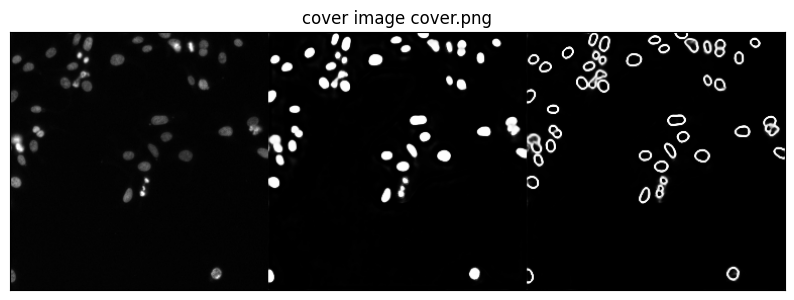

In [7]:
for i, cover in enumerate(model.covers):
    downloaded_cover = download(cover)
    cover_data: NDArray[Any] = imread(downloaded_cover.read())  # type: ignore
    _ = plt.figure(figsize=(10, 10))
    plt.imshow(cover_data)  # type: ignore
    plt.xticks([])  # type: ignore
    plt.yticks([])  # type: ignore
    plt.title(f"cover image {downloaded_cover.original_file_name}")  # type: ignore
    plt.show()

### Inspect available weight formats of the model

Multiple popular deep learning frameworks exist, for example keras, tensorflow, pytorch, onnx, ... The bioimage zoo will automatically select from the available model formats, so in general no further consideration is needed.

However, developers can programatically access the model formats as shown below.

In [8]:
for w in (
    (weights := model.weights).onnx,
    weights.keras_hdf5,
    weights.tensorflow_js,
    weights.tensorflow_saved_model_bundle,
    weights.torchscript,
    weights.pytorch_state_dict,
):
    if w is None:
        continue

    print(w.weights_format_name)
    print(f"weights are available at {w.source.absolute()}")
    print(f"and have a SHA-256 value of {w.sha256}")
    details = {
        k: v
        for k, v in w.model_dump(mode="json", exclude_none=True).items()
        if k not in ("source", "sha256")
    }
    if details:
        print(f"additonal metadata for {w.weights_format_name}:")
        pprint(details)

    print()

ONNX
weights are available at https://hypha.aicell.io/bioimage-io/artifacts/affable-shark/files/weights.onnx
and have a SHA-256 value of df913b85947f5132bcdaf81d91af0963f60d44f4caf8a4fec672d96a2f327b44
additonal metadata for ONNX:
{'comment': '', 'opset_version': 12, 'parent': 'pytorch_state_dict'}

TorchScript
weights are available at https://hypha.aicell.io/bioimage-io/artifacts/affable-shark/files/weights-torchscript.pt
and have a SHA-256 value of 8410950508655a300793b389c815dc30b1334062fc1dadb1e15e55a93cbb99a0
additonal metadata for TorchScript:
{'comment': '', 'parent': 'pytorch_state_dict', 'pytorch_version': '1.10'}

Pytorch State Dict
weights are available at https://hypha.aicell.io/bioimage-io/artifacts/affable-shark/files/weights.pt
and have a SHA-256 value of 608f52cd7f5119f7a7b8272395b0c169714e8be34536eaf159820f72a1d6a5b7
additonal metadata for Pytorch State Dict:
{'architecture': {'callable': 'UNet2d',
                  'kwargs': {'depth': 4,
                             '

### Inspect expected inputs and outputs of the model

This defines the IO of the model. To use the model correctly the inputs must match the description, for example shape, axis order, ...

In [9]:
print(
    f"Model '{model.name}' requires {len(model.inputs)} input(s) with the following features:"
)
for ipt in model.inputs:
    print(f"\ninput '{ipt.id}' with axes:")
    pprint(ipt.axes)
    print(f"Data description: {ipt.data}")
    print(f"Test tensor available at:  {ipt.test_tensor.source.absolute()}")
    if len(ipt.preprocessing) > 1:
        print("This input is preprocessed with: ")
        for p in ipt.preprocessing:
            print(p)

print(
    "\n-------------------------------------------------------------------------------"
)
# # and what the model outputs are
print(
    f"Model '{model.name}' requires {len(model.outputs)} output(s) with the following features:"
)
for out in model.outputs:
    print(f"\noutput '{out.id}' with axes:")
    pprint(out.axes)
    print(f"Data description: {out.data}")
    print(f"Test tensor available at:  {out.test_tensor.source.absolute()}")
    if len(out.postprocessing) > 1:
        print("This output is postprocessed with: ")
        for p in out.postprocessing:
            print(p)

Model 'Nuclei Segmentation Boundary Model' requires 1 input(s) with the following features:

input 'input0' with axes:
[BatchAxis(id='batch', description='', type='batch', size=None),
 ChannelAxis(id='channel', description='', type='channel', channel_names=['channel0']),
 SpaceInputAxis(size=ParameterizedSize(min=64, step=16), id='y', description='', type='space', unit=None, scale=1.0, concatenable=False),
 SpaceInputAxis(size=ParameterizedSize(min=64, step=16), id='x', description='', type='space', unit=None, scale=1.0, concatenable=False)]
Data description: type='float32' range=(None, None) unit='arbitrary unit' scale=1.0 offset=None
Test tensor available at:  https://hypha.aicell.io/bioimage-io/artifacts/affable-shark/files/test_input_0.npy
This input is preprocessed with: 
id='ensure_dtype' kwargs=EnsureDtypeKwargs(dtype='float32')
id='zero_mean_unit_variance' kwargs=ZeroMeanUnitVarianceKwargs(axes=['channel', 'y', 'x'], eps=1e-06)
id='ensure_dtype' kwargs=EnsureDtypeKwargs(dtype='

### Inspect model architecture (advanced)

For deeper understanding/details of the model's architecture the following specifies the location of
the network source code.
Note: inspection is only implemented for pytorch state dict weights.

In [10]:
from typing_extensions import assert_never

from bioimageio.spec.model.v0_5 import (
    ArchitectureFromFileDescr,
    ArchitectureFromLibraryDescr,
)

assert isinstance(model, ModelDescr)
if (w := model.weights.pytorch_state_dict) is not None:
    arch = w.architecture
    print(f"callable: {arch.callable}")
    if isinstance(arch, ArchitectureFromFileDescr):
        print(f"import from file: {arch.source.absolute()}")
        if arch.sha256 is not None:
            print(f"SHA-256: {arch.sha256}")
    elif isinstance(arch, ArchitectureFromLibraryDescr):
        print(f"import from module: {arch.import_from}")
    else:
        assert_never(arch)

callable: UNet2d
import from file: https://hypha.aicell.io/bioimage-io/artifacts/affable-shark/files/unet.py
SHA-256: 7f5b15948e8e2c91f78dcff34fbf30af517073e91ba487f3edb982b948d099b3


# **Create a new model description**

Creating a model description with bioimageio.spec means creating a `bioimageio.spec.model.ModelDescr` object. This description object can be exported and uploaded to the BioImage Model Zoo or deployed directly with community partner software.


Without any input arguments, initializing a `ModelDescr` will raise a `ValidationError` listing missing required fields:

In [11]:
from bioimageio.spec.model.v0_5 import ModelDescr

_ = ModelDescr()  # pyright: ignore[reportCallIssue]

2025-09-19 10:28:28.302 | Level 35 | pydantic.main:__init__:253 - description: Needs to be filled for FAIR compliance
2025-09-19 10:28:28.305 | Level 35 | pydantic.main:__init__:253 - authors: Needs to be filled for FAIR compliance
2025-09-19 10:28:28.307 | Level 35 | pydantic.main:__init__:253 - cite: Needs to be filled for FAIR compliance
2025-09-19 10:28:28.311 | Level 35 | pydantic.main:__init__:253 - license: Needs to be filled for FAIR compliance
2025-09-19 10:28:28.315 | Level 35 | pydantic.main:__init__:253 - tags: Needs to be filled for FAIR compliance
2025-09-19 10:28:28.317 | Level 35 | pydantic.main:__init__:253 - documentation: Needs to be filled for FAIR compliance


ValidationError: 4 validation errors for ModelDescr:
name
  Field required [input={'format_version': '0.5.5', 'type': 'model'}]
inputs
  Field required [input={'format_version': '0.5.5', 'type': 'model'}]
outputs
  Field required [input={'format_version': '0.5.5', 'type': 'model'}]
weights
  Field required [input={'format_version': '0.5.5', 'type': 'model'}]

To populate a `ModelDescr` appropriately we need to create the required subparts. This is part of the model metadata needed to document the model and ensure its correct deployment.

### Inputs

The `inputs` field is defined as a sequence of `InputTensorDescr` objects. We can inspect the required arguments for `InputTensorDescr` by attempting to intialise and inspect the validation error. A model may require multiple inputs, which should be specified as a sequence of inputs. In this example our model only requires a single input as specified below.

In [12]:
from bioimageio.spec.model.v0_5 import InputTensorDescr

_ = InputTensorDescr()  # pyright: ignore[reportCallIssue]

2025-09-19 10:30:32.206 | Level 35 | pydantic.main:__init__:253 - test_tensor: Needs to be filled for FAIR compliance
2025-09-19 10:30:32.209 | Level 35 | pydantic.main:__init__:253 - sample_tensor: Needs to be filled for FAIR compliance


ValidationError: 1 validation errors for InputTensorDescr:
axes
  Field required [input={}]

In [13]:
from bioimageio.spec.model.v0_5 import (
    AxisId,
    BatchAxis,
    ChannelAxis,
    HttpUrl,
    FileDescr,
    Identifier,
    InputTensorDescr,
    IntervalOrRatioDataDescr,
    ParameterizedSize,
    SpaceInputAxis,
    TensorId,
)

data_root = "https://uk1s3.embassy.ebi.ac.uk/public-datasets/bioimage.io/affable-shark/1.2/files/"

my_model_inputs = [
    InputTensorDescr(
        id=TensorId("raw"),
        axes=[
            BatchAxis(),
            ChannelAxis(channel_names=[Identifier("raw")]),
            SpaceInputAxis(id=AxisId("y"), size=ParameterizedSize(min=64, step=16)),
            SpaceInputAxis(id=AxisId("x"), size=ParameterizedSize(min=64, step=16)),
        ],
        data=IntervalOrRatioDataDescr(type="float32"),
        test_tensor=FileDescr(source=HttpUrl(data_root + "test_input_0.npy")),
        sample_tensor=FileDescr(source=HttpUrl(data_root + "sample_input_0.tif")),
    )
]

### Outputs

The outputs field is defined as a sequence of `OutputTensorDescr` objects. We can inspect the required arguments for `OutputTensorDescr` by attempting to intialise an empty object. A model may produce multiple outputs, but in this example our model only produces a single output as specified below.

In [14]:
from bioimageio.spec.model.v0_5 import OutputTensorDescr

_ = OutputTensorDescr()  # pyright: ignore[reportCallIssue]

2025-09-19 10:30:37.781 | Level 35 | pydantic.main:__init__:253 - test_tensor: Needs to be filled for FAIR compliance
2025-09-19 10:30:37.783 | Level 35 | pydantic.main:__init__:253 - sample_tensor: Needs to be filled for FAIR compliance


ValidationError: 1 validation errors for OutputTensorDescr:
axes
  Field required [input={}]

In [15]:
from bioimageio.spec.model.v0_5 import (
    OutputTensorDescr,
    SizeReference,
    SpaceOutputAxisWithHalo,
)

assert isinstance(model.outputs[0].axes[1], ChannelAxis)
my_model_outputs = [
    OutputTensorDescr(
        id=TensorId("predictions"),
        axes=[
            BatchAxis(),
            ChannelAxis(
                channel_names=[
                    Identifier("nuclei_probability"),
                    Identifier("membrane_probability"),
                ]
            ),
            SpaceOutputAxisWithHalo(
                id=AxisId("y"),
                halo=16,
                size=SizeReference(tensor_id=TensorId("raw"), axis_id=AxisId("y")),
            ),  # same size as input (tensor `raw`) axis `y`
            SpaceOutputAxisWithHalo(
                id=AxisId("x"),
                halo=16,
                size=SizeReference(tensor_id=TensorId("raw"), axis_id=AxisId("x")),
            ),
        ],
        test_tensor=FileDescr(source=HttpUrl(data_root + "test_output_0.npy")),
        sample_tensor=FileDescr(source=HttpUrl(data_root + "sample_output_0.tif")),
    )
]

### Network weights

Next we need to define the network weights.

In this example we use a `PytorchStateDictWeightsDescr` to describe weights saved in PyTorch's default 'state dict' format. 

Let's see what fields we need to fill out...

In [16]:
from bioimageio.spec.model.v0_5 import PytorchStateDictWeightsDescr

_ = PytorchStateDictWeightsDescr()  # pyright: ignore[reportCallIssue]

ValidationError: 3 validation errors for PytorchStateDictWeightsDescr:
source
  Field required [input={}]
architecture
  Field required [input={}]
pytorch_version
  Field required [input={}]

#### Network architecture

As we use PyTorch state dict weights in this example,  in addition to the trained weights we need to specify the network architecture. 
We can specify the network architecture using either the `ArchitectureFromFileDescr` or `ArchitectureFromLibraryDescr` objects. 

Use`ArchitectureFromFileDescr` if you have a custom source code file that implements your network architecture.

Use `ArchitectureFromLibraryDescr` to reference a callable from a published Python library.

In [17]:
import torch

from bioimageio.spec.model.v0_5 import (
    ArchitectureFromFileDescr,
    Sha256,
    Version,
)

my_architecture = ArchitectureFromFileDescr(
    source=HttpUrl(data_root + "unet.py"),
    sha256=Sha256("7f5b15948e8e2c91f78dcff34fbf30af517073e91ba487f3edb982b948d099b3"),
    callable=Identifier("UNet2d"),
    kwargs=dict(
        depth=4,
        final_activation="Sigmoid",
        gain=2,
        in_channels=1,
        initial_features=64,
        out_channels=2,
        postprocessing=None,
        return_side_outputs=False,
    ),
)

With the described architecture we can create a `PytorchStateDictWeightsDescr` like so:

In [18]:
from bioimageio.spec.model.v0_5 import PytorchStateDictWeightsDescr

my_pytorch_state_dict_weights = PytorchStateDictWeightsDescr(
    source=HttpUrl(data_root + "weights.pt"),
    sha256=Sha256("608f52cd7f5119f7a7b8272395b0c169714e8be34536eaf159820f72a1d6a5b7"),
    architecture=my_architecture,
    pytorch_version=Version(torch.__version__),
)

Let's also describe TorchScript weights (that we converted from the Pytorch State Dict weights that we got from training the network). 

In [19]:
from bioimageio.spec.model.v0_5 import TorchscriptWeightsDescr

my_torchscript_weights = TorchscriptWeightsDescr(
    source=HttpUrl(data_root + "weights-torchscript.pt"),
    sha256=Sha256("8410950508655a300793b389c815dc30b1334062fc1dadb1e15e55a93cbb99a0"),
    pytorch_version=Version(torch.__version__),
    parent="pytorch_state_dict",  # these weights were converted from the pytorch_state_dict weights ones.
)

### FAIR metadata

In [20]:
from bioimageio.spec.model.v0_5 import (
    Author,
    CiteEntry,
    Doi,
    HttpUrl,
    LicenseId,
)

my_model_name = "My cool Model"
my_model_description = "A test model for demonstration purposes only"
my_model_authors = [
    Author(name="me", affiliation="my institute", github_user="bioimageiobot")
]  # change github_user to your GitHub account name
my_model_citations = [
    CiteEntry(text="for model training see my paper", doi=Doi("10.1234something"))
]
my_model_license = LicenseId("MIT")
my_model_documentation = HttpUrl(
    "https://uk1s3.embassy.ebi.ac.uk/public-datasets/bioimage.io/affable-shark/1.2/files/documentation.md"
)
my_model_git_repo = HttpUrl("https://github.com/constantinpape/torch-em")

### Putting it all together to create your model

Amazing!!! You are now ready to put it all together into a single model description.

In [21]:
from bioimageio.spec.model.v0_5 import WeightsDescr

my_model = ModelDescr(
    name=my_model_name,
    description=my_model_description,
    documentation=my_model_documentation,
    authors=my_model_authors,
    cite=my_model_citations,
    license=my_model_license,
    git_repo=my_model_git_repo,  # change to repo where your model is developed
    inputs=my_model_inputs,
    # inputs=[input_descr],  # try out our recreated input description
    outputs=my_model_outputs,
    # outputs=[output_descr],  # try out our recreated input description
    weights=WeightsDescr(
        pytorch_state_dict=my_pytorch_state_dict_weights,
        torchscript=my_torchscript_weights,
    ),
)
print(f"created '{my_model.name}'")

2025-09-19 10:30:57.864 | Level 35 | pydantic.main:__init__:253 - tags: Needs to be filled for FAIR compliance


created 'My cool Model'


### An extra note -- Default values (e.g. Covers)

Some optional fields may be filled with default values, e.g., we did not specify the optional `covers` field.
When possible, a default visualization of the test inputs and test outputs is generated.
When the input or the output have more than one channel, the current implementation cannot generate a cover image automatically.

## Validation of the new model

### Format summary


On creation a model must meet the format specification and validation is run implcitly. We already saw this above when we purposely intilaised empty description objects during creation of the model description.

Below we can inspect a summary of the corresponding validation by accessing the `validation_summary` attribute.

The validation summary will indicate:
- the version of the `bioimageio.spec` library used to run the validation
- the status of several validation steps
    - ✔️: Success
    - 🔍: information about the validation context
    - ⚠: Warning
    - ❌: Error

To display the validaiton summary in a terminal or notebook we recommend to run:

In [22]:
my_model.validation_summary.display()

🟡 
 bioimageio format validation 
 
 
 status 
 valid-format 
 
 
 source 
 in-memory 
 
 
 format version 
 model 0.5.5 
 
 
 bioimageio.spec 
 0.5.5.4 
 
 
 
 
 
 Location 
 Details 
 
 
 ✔️ 
 
 Successfully created `ModelDescr` instance.

### Test Model

In addition to having a correctly formatted description we also require the model to pass further tests, e.g. producing the correct test output image(s) from the test input image(s). If you have the `bioimageio.core` library installed, you can conveniently run model tests as below.

In [23]:
from bioimageio.core import test_model

summary = test_model(my_model)
summary.display()

✔️ 
 bioimageio format validation 
 
 
 status 
 passed 
 
 
 source 
 in-memory 
 
 
 format version 
 model 0.5.5 
 
 
 bioimageio.core 
 0.9.1 
 
 
 bioimageio.spec 
 0.5.5.4 
 
 
 
 
 
 Location 
 Details 
 
 
 ✔️ 
 
 Successfully created `ModelDescr` instance. 
 
 
 ✔️ 
 type 
 Has expected resource type 
 
 
 ✔️ 
 weights.pytorch_state_dict 
 Reproduce test outputs from test inputs (pytorch_state_dict) 
 
 
 
 weights.pytorch_state_dict 
 recommended conda environment (Reproduce test outputs from test inputs (pytorch_state_dict)) 
 
 
 
 
 %YAML 1.2
---
channels:
 - conda-forge
 - nodefaults
dependencies:
 - conda-forge::bioimageio.core
 - numpy >=2,<3
 - pip
 - pytorch==2.8.0
 - torchaudio
 - torchvision
 
 
 
 
 weights.pytorch_state_dict 
 conda compare (Reproduce test outputs from test inputs (pytorch_state_dict)) 
 
 
 
 
 bioimageio.core not found numpy found but mismatch. Specification pkg: numpy[version='>=2,<3'],
Running pkg: numpy==1.26.4=pypi_0 pytorch not found torchaudio not found 
 
 
 ✔️ 
 weights.pytorch_state_dict 
 Run pytorch_state_dict inference for inputs with batch_size: 1 and size parameter n: 0 
 
 
 ✔️ 
 weights.pytorch_state_dict 
 Run pytorch_state_dict inference for inputs with batch_size: 1 and size parameter n: 1 
 
 
 ✔️ 
 weights.pytorch_state_dict 
 Run pytorch_state_dict inference for inputs with batch_size: 1 and size parameter n: 2 
 
 
 ✔️ 
 weights.pytorch_state_dict 
 Run pytorch_state_dict inference for inputs with batch_size: 2 and size parameter n: 0 
 
 
 ✔️ 
 weights.pytorch_state_dict 
 Run pytorch_state_dict inference for inputs with batch_size: 2 and size parameter n: 1 
 
 
 ✔️ 
 weights.pytorch_state_dict 
 Run pytorch_state_dict inference for inputs with batch_size: 2 and size parameter n: 2 
 
 
 ✔️ 
 weights.torchscript 
 Reproduce test outputs from test inputs (torchscript) 
 
 
 
 weights.torchscript 
 recommended conda environment (Reproduce test outputs from test inputs (torchscript)) 
 
 
 
 
 %YAML 1.2
---
channels:
 - conda-forge
 - nodefaults
dependencies:
 - conda-forge::bioimageio.core
 - numpy >=2,<3
 - pip
 - pytorch==2.8.0
 - torchaudio
 - torchvision
 
 
 
 
 weights.torchscript 
 conda compare (Reproduce test outputs from test inputs (torchscript)) 
 
 
 
 
 bioimageio.core not found numpy found but mismatch. Specification pkg: numpy[version='>=2,<3'],
Running pkg: numpy==1.26.4=pypi_0 pytorch not found torchaudio not found 
 
 
 ✔️ 
 weights.torchscript 
 Run torchscript inference for inputs with batch_size: 1 and size parameter n: 0 
 
 
 ✔️ 
 weights.torchscript 
 Run torchscript inference for inputs with batch_size: 1 and size parameter n: 1 
 
 
 ✔️ 
 weights.torchscript 
 Run torchscript inference for inputs with batch_size: 1 and size parameter n: 2 
 
 
 ✔️ 
 weights.torchscript 
 Run torchscript inference for inputs with batch_size: 2 and size parameter n: 0 
 
 
 ✔️ 
 weights.torchscript 
 Run torchscript inference for inputs with batch_size: 2 and size parameter n: 1 
 
 
 ✔️ 
 weights.torchscript 
 Run torchscript inference for inputs with batch_size: 2 and size parameter n: 2

For a more extensive example of the use of bioimageio.core, check out [model_usage.ipynb](https://github.com/bioimage-io/core-bioimage-io-python/blob/main/example/model_usage.ipynb).
The bioimageio.core library is documented [here](https://bioimage-io.github.io/core-bioimage-io-python/bioimageio/core.html).

## Package your model

A model is more than it's YAML description file! We refer to a zip-file containing all files relevant to a model as a model package.

In [24]:
from pathlib import Path

from bioimageio.spec import save_bioimageio_package

print(
    "package path:",
    save_bioimageio_package(my_model, output_path=Path("my_model.zip")),
)

package path: my_model.zip


Now your model is fully ready to be shared, and we highly encourage you to upload your model to the [BioImage Model Zoo](https://dev.bioimage.io/#/upload). Lets build a FAIR bioimage community together!